In [35]:
import math, time 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

import torch
import torchvision.datasets as datasets
print(torch.__version__)

1.9.0+cu111


In [12]:
# digits = datasets.load_digits()


mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [14]:
print(f"train={len(mnist_trainset)},test={len(mnist_testset)}")

train=60000,test=10000


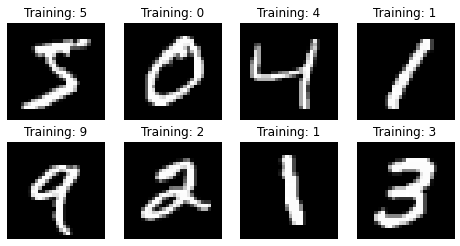

In [145]:
image_sample=[]
label_sample=[]
row=2
col=4
for i in range(0,row*col):
    img,label=mnist_trainset[i]
    #print(item)
    #print(label)
    image_sample.append(img)
    label_sample.append(label)

fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(8, 4))

#for ax, image, label in zip(axes, image_sample, label_sample):
for i in range(0,row):
    for j in range(0,col):
        ax= axes[i][j]
        ax.set_axis_off()
        image=image_sample[i*col+j]
        label=label_sample[i*col+j]
        #ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
        ax.set_title('Training: %i' % label)
plt.show()



In [127]:
import random
train_X=[]
train_y=[]
test_X=[]
test_y=[]
train_size=10000
test_size=1000
idx_train = [random.randint(0,len(mnist_trainset)-1) for _ in range(train_size)]
idx_test = [random.randint(0,len(mnist_testset)-1) for _ in range(test_size)]

for i in idx_train:
    img,label=mnist_trainset[i]
    train_X.append(np.asarray(img).ravel())
    train_y.append(label)

for i in idx_test:
    img,label=mnist_testset[i]
    test_X.append(np.asarray(img).ravel())
    test_y.append(label)



train_X = np.asarray(train_X)
test_X=np.asarray(test_X)
print(train_X.shape)
print(train_X[0])

(10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  64 253 193  37   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  16 206 252 222  16   0   0   0   0   0   0  80   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   8 129 252 252 247  53   0   0   0
   0   0  73 200  35   0   0   0   0   0   0   0   0   0   0   0   0   0
  18 181 252 252 252 222  16   0   0  

In [57]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf =  make_pipeline(StandardScaler(),svm.SVC(kernel='rbf',gamma='auto',probability=True))
clf.fit(train_X, train_y)
print("Training done.")
y_pred=clf.predict(test_X)
rslt = classification_report(test_y, y_pred)
print(rslt)

Training done.
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        86
           1       0.99      0.98      0.99       108
           2       0.91      0.92      0.92        88
           3       0.96      0.89      0.92       100
           4       0.97      0.97      0.97       109
           5       0.95      0.91      0.93        96
           6       0.95      0.95      0.95        98
           7       0.85      0.93      0.89        99
           8       0.95      0.92      0.94       105
           9       0.93      0.93      0.93       111

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [58]:
pred_probas=clf.predict_proba(test_X)
print(pred_probas.shape)

(1000, 10)


In [98]:
import plotly.graph_objects as go
yactual = np.asarray(test_y)
print()
fig=go.Figure()
for i in range(10):
    items = y_pred[yactual==i]
    correct = items[items==i]
    err = items[items!=i]
#     fig.add_trace(go.Histogram(x=correct,
#                            nbinsx=10,name=f"c{i}",marker_color='blue',opacity=0.5,
#                               ))
    fig.add_trace(go.Histogram(x=err,
                           nbinsx=10,name=f"e{i}",marker_color=i,opacity=0.5))

fig.show()

In [99]:
import plotly.graph_objects as go
yactual = np.asarray(test_y)
print()
fig=go.Figure()
for i in range(10):
    items = pred_probas[yactual==i][:,i]
    correct = items[items>0.5]
    err = items[items<0.5]
    fig.add_trace(go.Histogram(x=correct,
                           nbinsx=10,name=f"c{i}",marker_color='blue',opacity=0.5,
                              ))
    fig.add_trace(go.Histogram(x=err,
                           nbinsx=10,name=f"e{i}",marker_color='red',opacity=0.5))
fig.show()

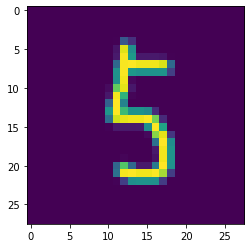

(1, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  70  35
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  14 243 126   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18
 252 139  17  17  17  15   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  87 253 255 250 250 250 241  87   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 131 253 137 130 130 130 131  48   0  

In [144]:
from PIL import Image, ImageOps
digit_items=[]
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
with Image.open("./data/5.png") as im:
    im_resized = im.resize((28, 28))
    data=np.asarray(ImageOps.invert(ImageOps.grayscale(im_resized)))
    digit_items.append(data)
    plt.imshow(data,cmap=plt.get_cmap('gray'))
    plt.show()
digit_items = np.asarray(digit_items).reshape(len(digit_items),-1)
print(digit_items.shape)
print(digit_items[0])

In [143]:
y_pred_digit=clf.predict(digit_items)
print(y_pred_digit)

[5]
